<a href="https://colab.research.google.com/github/ELiTE0005/NNML-algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 600x500 with 0 Axes>

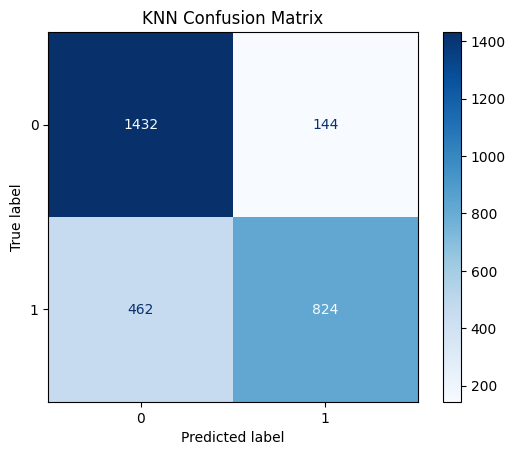

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/cybersecurity_intrusion_data.xlsx"
df = pd.read_excel(file_path, sheet_name='cybersecurity_intrusion_data')

# Drop session_id
df_clean = df.drop(columns=['session_id'])

# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['protocol_type', 'encryption_used', 'browser_type'])

# Separate features and target
X = df_encoded.drop(columns=['attack_detected'])
y = df_encoded['attack_detected']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()
